<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Neural Network Model

### Initializations

In [26]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

In [27]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [28]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Neural Network

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [31]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [32]:
mlp.score(X_test_scaled, y_test)

0.96125000000000005

In [33]:
predictions = mlp.predict(X_test_scaled)

In [23]:
print(confusion_matrix(y_test, predictions))

[[1830   17]
 [  55  498]]


In [16]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1847
          1       0.92      0.91      0.92       553

avg / total       0.96      0.96      0.96      2400



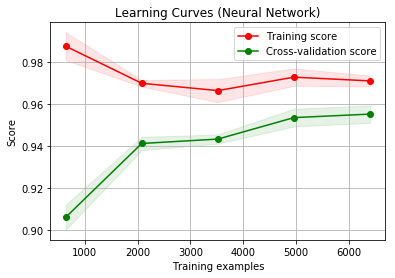

In [17]:
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Neural Network w/o Department

In [60]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [61]:
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [62]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
mlp.score(X_test_scaled, y_test)

0.96999999999999997

In [64]:
predictions = mlp.predict(X_test_scaled)

In [65]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1830   17]
 [  55  498]]


In [66]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1803,   44],
       [  49,  504]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1840,    7],
       [  24,  529]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}}


In [67]:
cm_dict.item().update({'neural_net':{'cm': cm, 'label': 'Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1830,   17],
       [  55,  498]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1840,    7],
       [  24,  529]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}}


In [68]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1847
          1       0.97      0.90      0.93       553

avg / total       0.97      0.97      0.97      2400



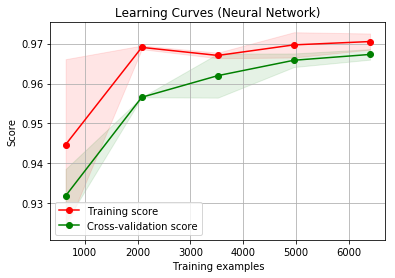

In [69]:
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()